In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ot
import ot.plot

In [2]:
def normal_random(N0, mu, sigmasqr):
    return mu + np.sqrt(sigmasqr) * np.random.randn(N0)

In [59]:
# Generate distributions
N = 30
p = 0.2 # mixing parameter of multimodal normal target

source_dist = normal_random(N, 2, 3) # N(2, 3)
target_dist = p * normal_random(N, 5, 7) + (1 - p) * normal_random(N, 7, 11) # mixture of N(5,7) and N(7,11)

<AxesSubplot: ylabel='Density'>

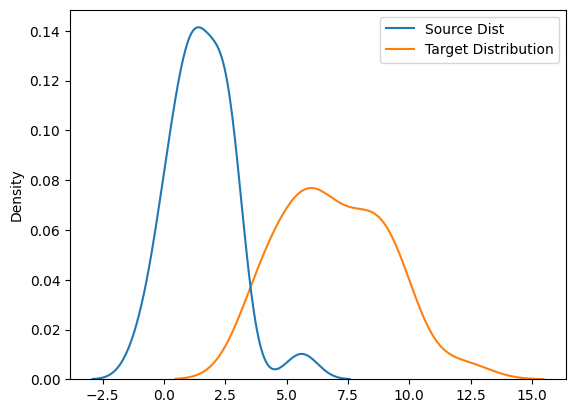

In [60]:
sns.kdeplot(pd.DataFrame({'Source Dist': source_dist, 'Target Distribution': target_dist}))

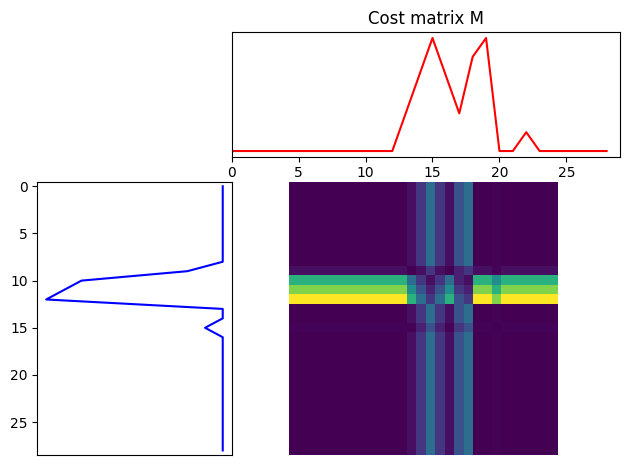

In [61]:
# Calculate bins
x = np.arange(-10, 20)

source_dist_hist, bin_edges = np.histogram(source_dist, bins=x)
target_dist_hist, bin_edges = np.histogram(target_dist, bins=x)
                                
# Loss matrix
M = ot.dist(source_dist_hist.reshape((x.shape[0]-1, 1)), target_dist_hist.reshape((x.shape[0]-1, 1)))
M = M / M.max()

ot.plot.plot1D_mat(source_dist_hist, target_dist_hist, M, 'Cost matrix M')

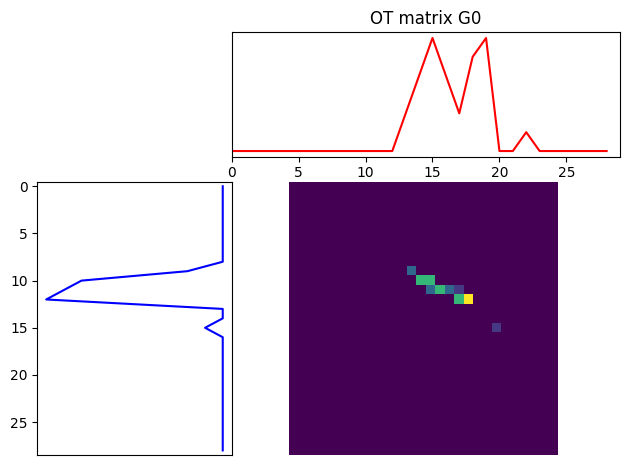

In [62]:
# Solve EMD
# use fast 1D solver
G0 = ot.emd_1d(x[:-1], x[:-1], source_dist_hist, target_dist_hist)

ot.plot.plot1D_mat(source_dist_hist, target_dist_hist, G0, 'OT matrix G0')